# Solution 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**age**: the age of the patient in years.

**sex**: the sex of the patient (1 = male, 0 = female).

**cp**: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

**trestbps**: the resting blood pressure of the patient in mm Hg.

**chol**: the serum cholesterol level of the patient in mg/dl.

**fbs**: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

**restecg**: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

**thalach**: the maximum heart rate achieved by the patient during exercise.
exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

**oldpeak**: the ST depression induced by exercise relative to rest.
slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest
Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

**ca**: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

**thal**: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

target: the presence of heart disease in the patient (0 = no disease, 1 = disease present).


In [4]:
# data Cleansing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
col=df.columns

In [11]:
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

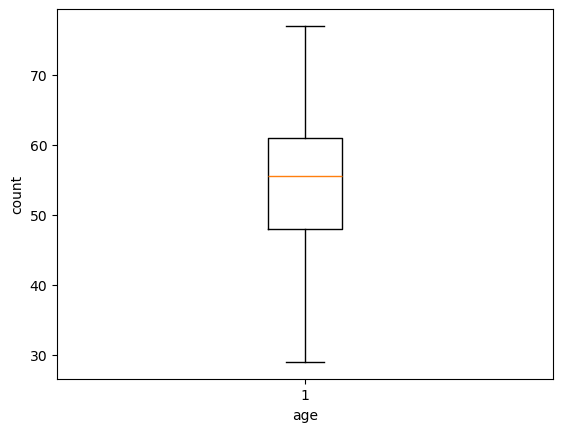

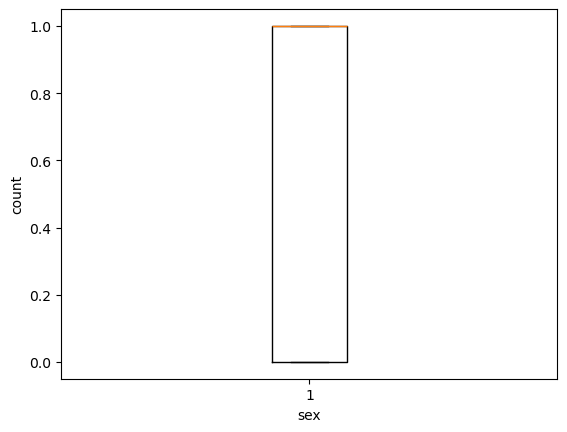

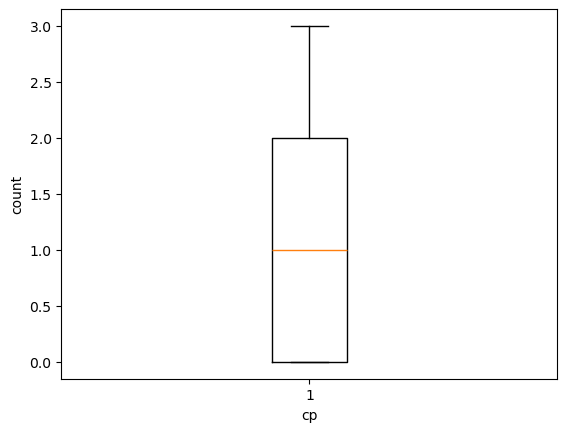

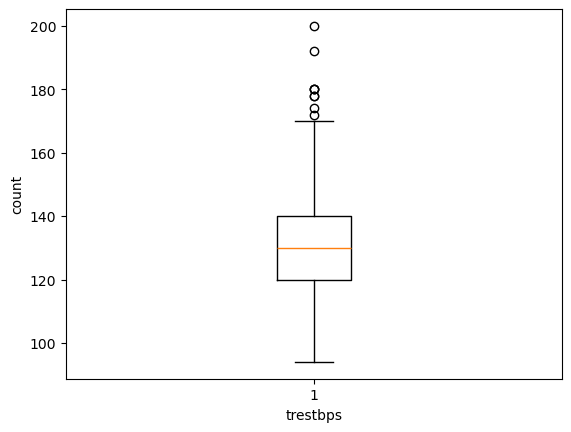

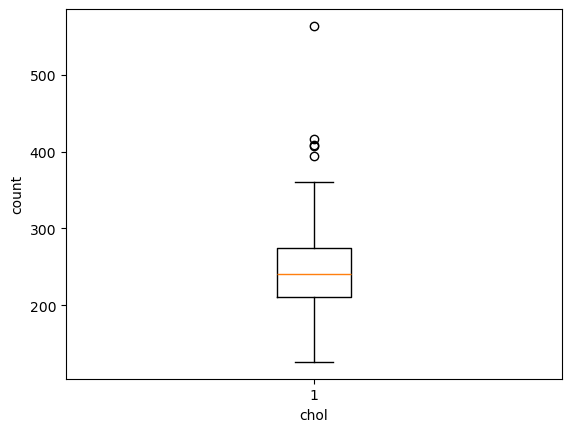

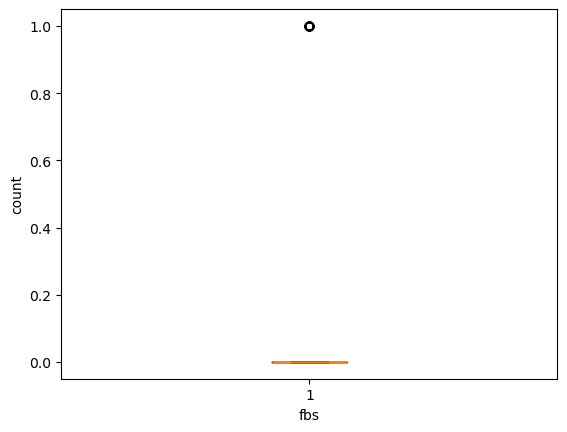

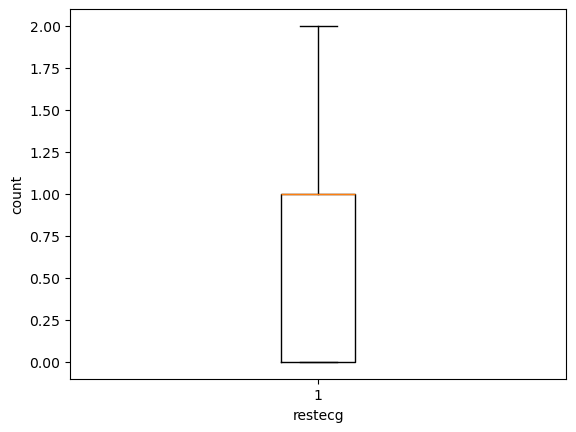

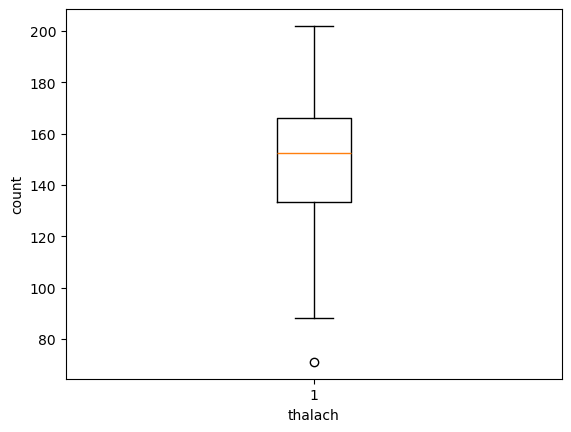

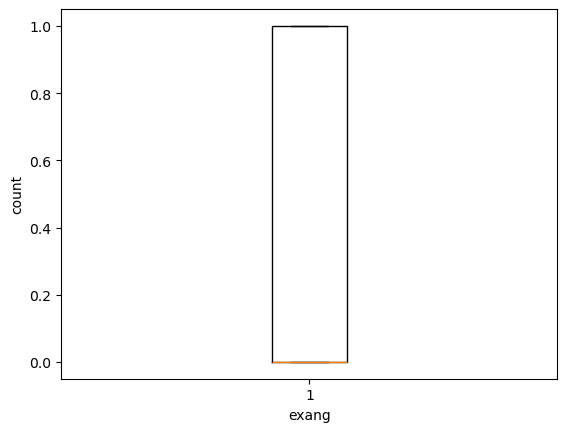

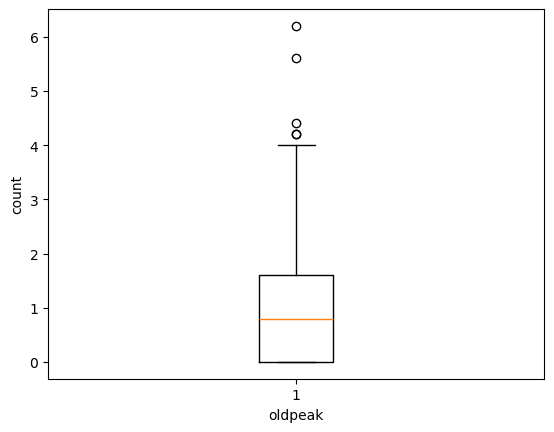

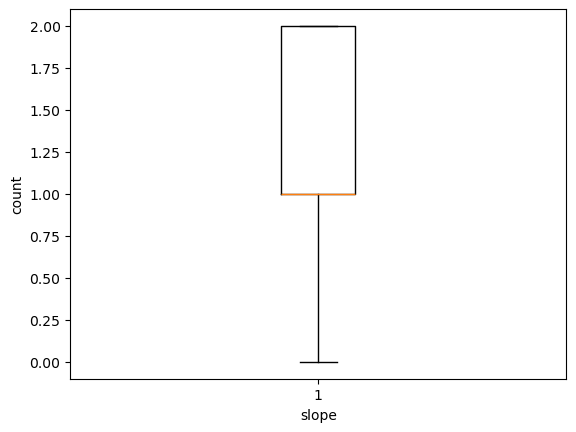

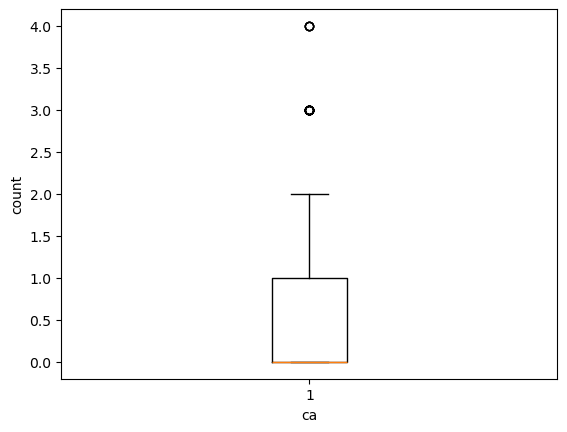

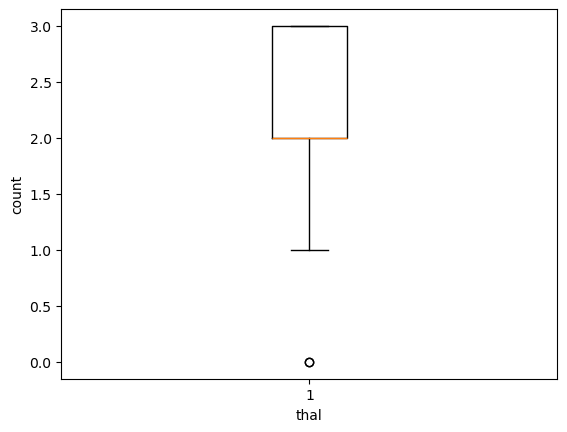

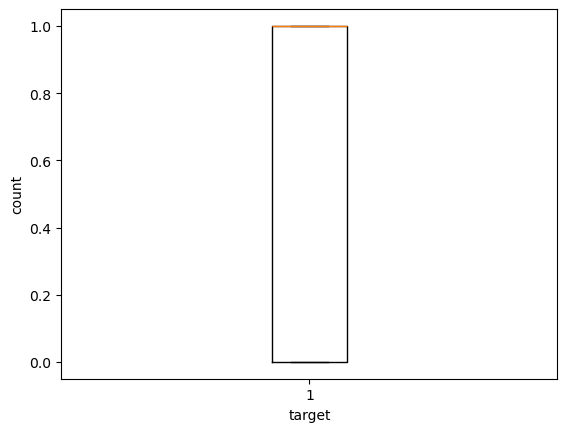

In [12]:
for i in col:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
    

In [13]:
out_cols=["trestbps","chol","thalach","oldpeak","ca","thal"]

In [14]:
df["fbs"].value_counts()

fbs
0    257
1     45
Name: count, dtype: int64

In [15]:
for i in out_cols:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    df=df[(df[i]>=LL) & (df[i]<=UL)]

In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


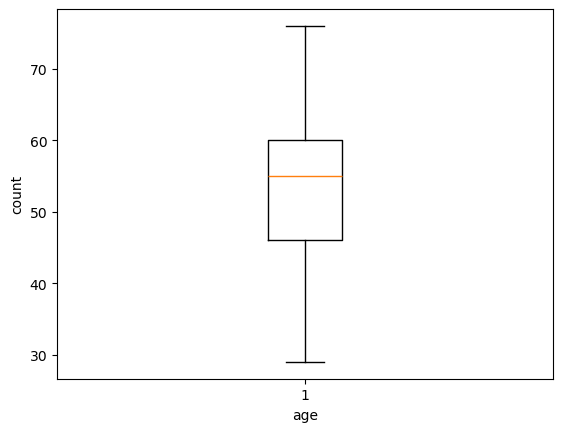

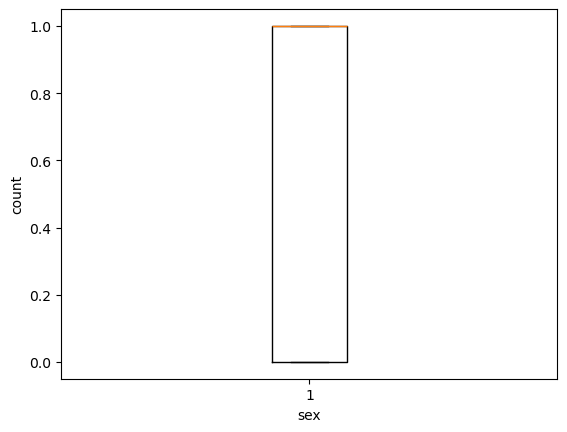

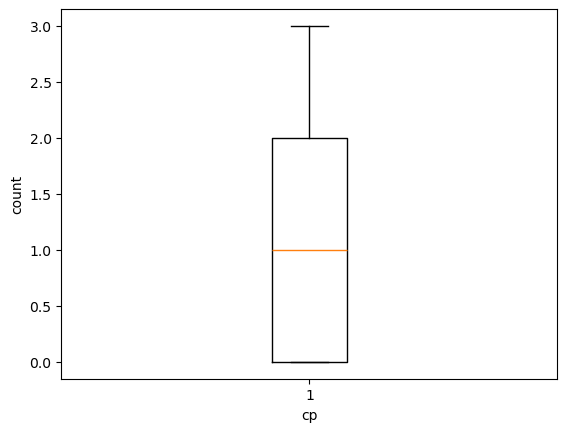

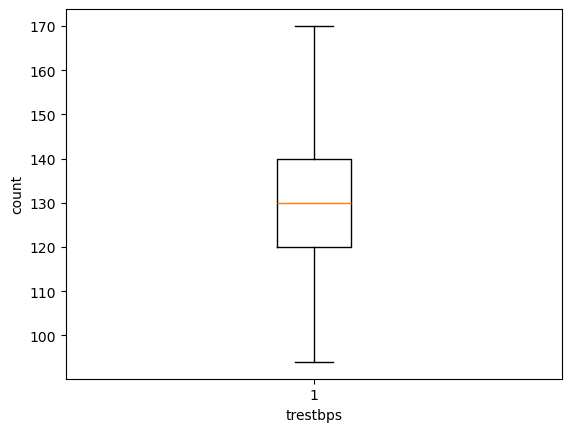

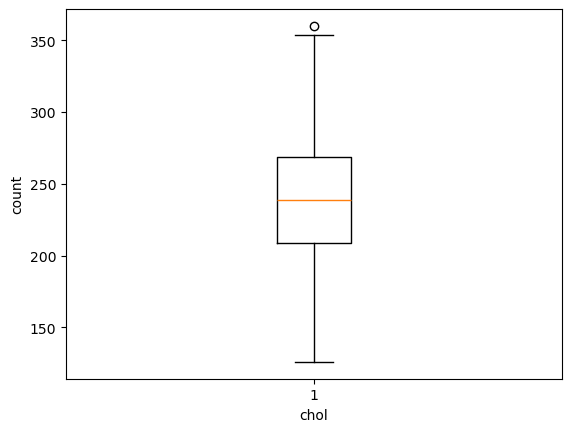

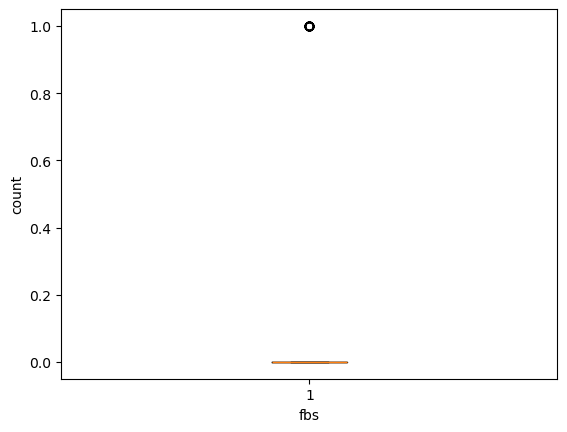

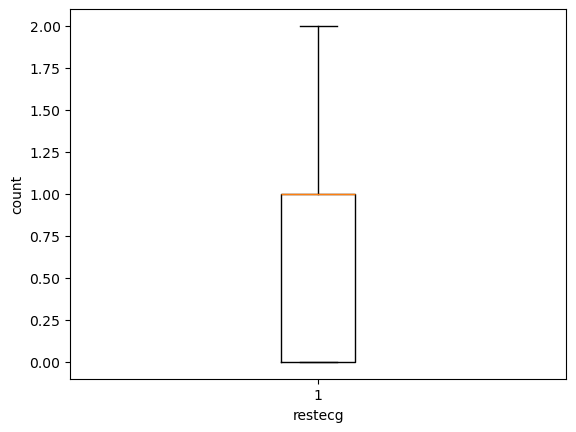

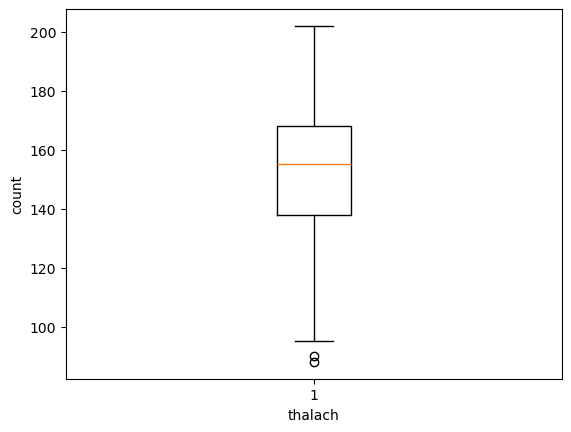

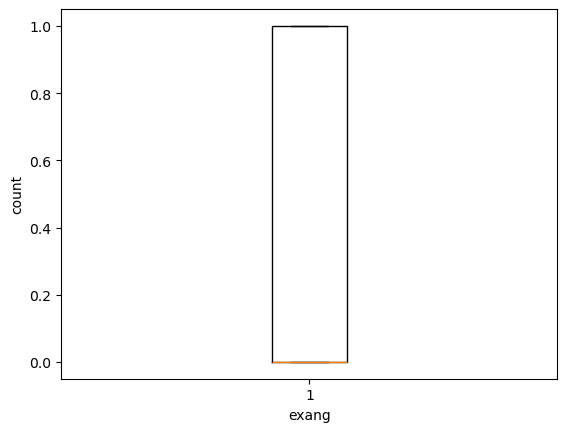

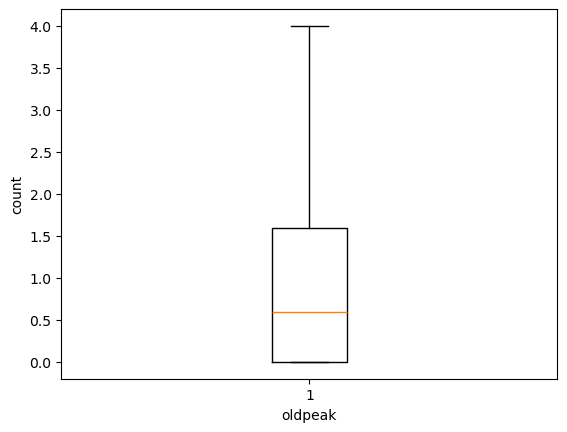

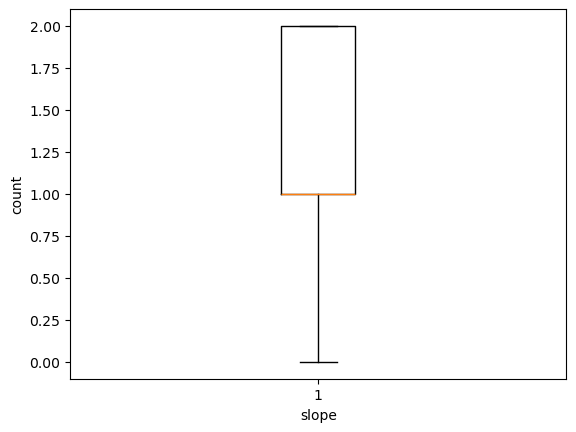

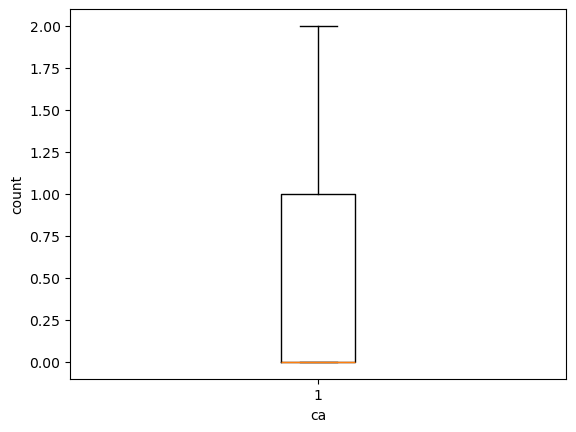

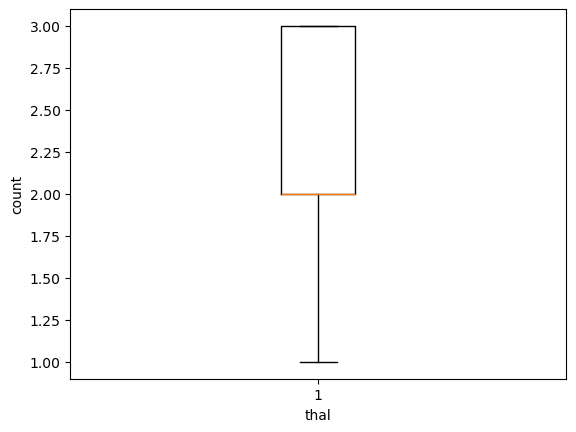

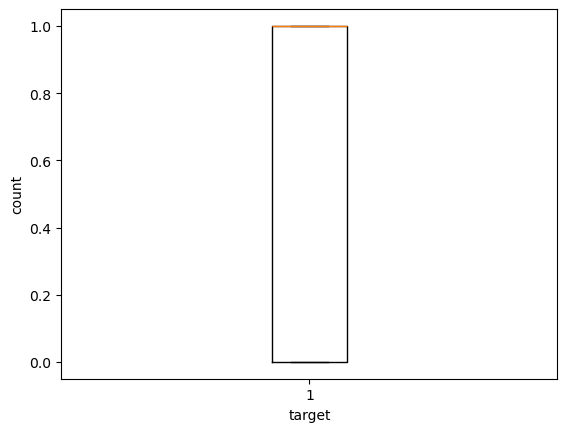

In [17]:
for i in col:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

In [18]:
#VIsualization

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

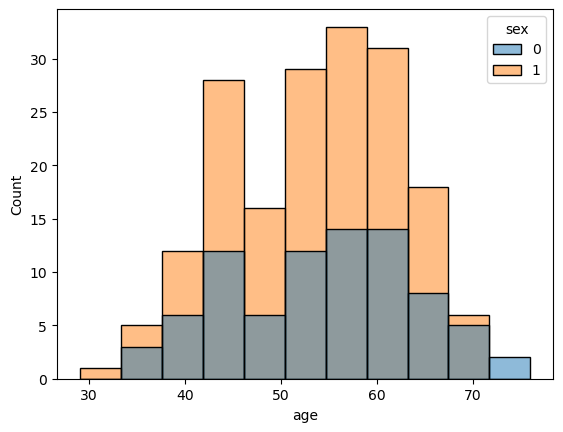

In [19]:
sns.histplot(data=df,x="age",hue="sex")

more population belongs to the men of age 50 -65

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

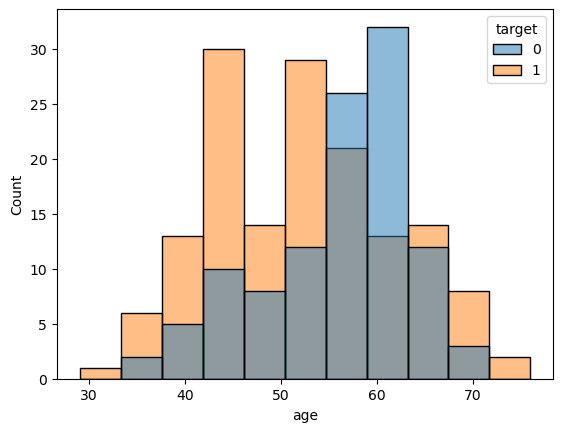

In [20]:
sns.histplot(data=df,x="age",hue="target")

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.073351,-0.035241,0.278920,0.133812,0.129412,-0.093388,-0.402763,0.087981,0.196866,-0.142630,0.384780,0.065053,-0.200652
sex,-0.073351,1.000000,-0.095629,0.004428,-0.136354,0.058807,-0.085572,-0.057410,0.173593,0.169247,-0.061194,0.089277,0.250717,-0.326947
cp,-0.035241,-0.095629,1.000000,0.107239,-0.036392,0.144697,0.064762,0.275477,-0.374546,-0.121328,0.079260,-0.210705,-0.186138,0.404529
trestbps,0.278920,0.004428,0.107239,1.000000,0.095666,0.137721,-0.130787,-0.039151,-0.015670,0.155010,-0.059844,0.056375,-0.007052,-0.088727
chol,0.133812,-0.136354,-0.036392,0.095666,1.000000,-0.020748,-0.120110,0.004277,0.050308,-0.025590,0.055914,0.087311,0.078786,-0.081495
fbs,0.129412,0.058807,0.144697,0.137721,-0.020748,1.000000,-0.080167,-0.009086,-0.009135,0.024096,-0.081466,0.115061,-0.077256,-0.002147
restecg,-0.093388,-0.085572,0.064762,-0.130787,-0.120110,-0.080167,1.000000,0.066547,-0.091047,-0.089314,0.120631,-0.081091,0.057675,0.144633
thalach,-0.402763,-0.057410,0.275477,-0.039151,0.004277,-0.009086,0.066547,1.000000,-0.418355,-0.338750,0.372933,-0.247480,-0.139463,0.403880
exang,0.087981,0.173593,-0.374546,-0.015670,0.050308,-0.009135,-0.091047,-0.418355,1.000000,0.348314,-0.265311,0.185935,0.250552,-0.425255
oldpeak,0.196866,0.169247,-0.121328,0.155010,-0.025590,0.024096,-0.089314,-0.338750,0.348314,1.000000,-0.527422,0.277341,0.183205,-0.439291


<Axes: >

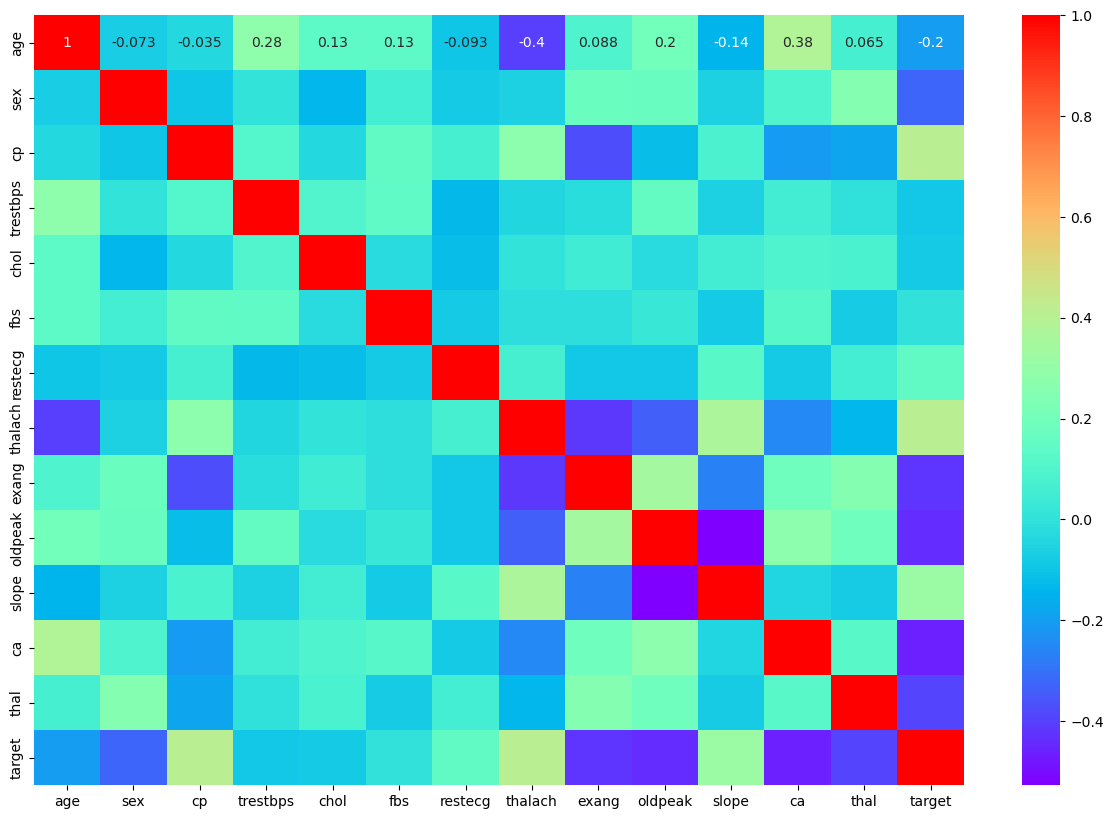

In [22]:
fig =plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="rainbow",annot=True)

VIF is not required in case of Tree algorithms

# Model Building

In [23]:
# split the data into Independent and dependent

In [24]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
x=df.iloc[:,:-1]

In [26]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
y=df["target"]

In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 261, dtype: int64

In [29]:
# splitting of data into training and testing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [32]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3


In [33]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3


In [34]:
y_train

302    0
211    0
50     1
256    0
277    0
      ..
194    0
142    1
156    1
293    0
151    1
Name: target, Length: 182, dtype: int64

In [35]:
y_test

301    0
240    0
67     1
111    1
80     1
      ..
38     1
242    0
26     1
257    0
198    0
Name: target, Length: 79, dtype: int64

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt_model=DecisionTreeClassifier(max_depth=4)

In [38]:
# Training of model 
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [39]:
#make prediction from model (testing the model)
dt_pred=dt_model.predict(x_test)

In [40]:
dt_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [41]:
y_test

301    0
240    0
67     1
111    1
80     1
      ..
38     1
242    0
26     1
257    0
198    0
Name: target, Length: 79, dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [43]:
accuracy_score(dt_pred,y_test)

0.6835443037974683

In [44]:
parameter_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [45]:
df2 = pd.DataFrame(columns=['max_depth', 'accuracy'])
df2

,max_depth,accuracy


In [46]:
for X in parameter_values:
    model = DecisionTreeClassifier(max_depth=X,random_state=30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    new_row = pd.DataFrame({'max_depth': [X], 'accuracy': [acc_score]})
    df2 = pd.concat([df2, new_row], ignore_index=True)
    #df2= df2.concat({'max_depth' : X , 'accuracy' : acc_score}, ignore_index=True) 
df2

C:\Users\Padmanaban.S\AppData\Local\Temp\ipykernel_9548\857692358.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = pd.concat([df2, new_row], ignore_index=True)


,max_depth,accuracy
0,1,72.151899
1,2,69.620253
2,3,72.151899
3,4,65.822785
4,5,70.886076
5,6,73.417722
6,7,68.354430
7,8,77.215190
8,9,77.215190
9,10,77.215190


In [47]:
final_model = DecisionTreeClassifier(max_depth=8,random_state=30)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)

In [48]:
accuracy_score(y_pred,y_test)

0.7721518987341772

In [49]:
cm=confusion_matrix(y_pred,y_test)

In [50]:
cm

array([[25, 11],
       [ 7, 36]], dtype=int64)

In [51]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.69      0.74        36
           1       0.77      0.84      0.80        43

    accuracy                           0.77        79
   macro avg       0.77      0.77      0.77        79
weighted avg       0.77      0.77      0.77        79

